# Clipping Streets and Exporting as a GeoPackage

Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

# Read in Boroughs Shapefile

In [2]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
boros = gpd.read_file(url)

# convert to crs 2263
boros = boros.to_crs(epsg=2263)

# sanity check
print('shape of data: {}'.format(boros.shape))
boros.head()

shape of data: (5, 5)


,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((1022227.320 152028.146, 102207..."


<AxesSubplot:>

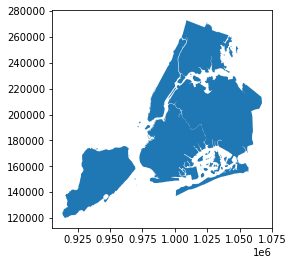

In [3]:
# sanity check map
boros.plot()

# Read in Street Segments GeoJSON

In [4]:
%%time
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

# convert to crs 2263
streets = streets.to_crs(epsg=2263)

# sanity check of data
print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (121483, 33)
CPU times: user 28.2 s, sys: 908 ms, total: 29.1 s
Wall time: 43.9 s


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,C,2,FT,None,BRUCKNER BLVD,-1,BRUCKNER,2007-11-29T00:00:00,None,"MULTILINESTRING ((1010270.223 233448.310, 1010..."
1,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29T00:00:00,64,"MULTILINESTRING ((979278.595 196555.690, 97929..."
2,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29T00:00:00,82,"MULTILINESTRING ((979377.413 196797.951, 97950..."
3,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29T00:00:00,98,"MULTILINESTRING ((979503.289 197024.782, 97964..."
4,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29T00:00:00,None,"MULTILINESTRING ((979553.746 196059.826, 97952..."


In [5]:
# summary of data
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121483 entries, 0 to 121482
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   rw_type     121483 non-null  object  
 1   l_low_hn    84396 non-null   object  
 2   pre_direct  10002 non-null   object  
 3   st_width    121483 non-null  object  
 4   r_zip       120185 non-null  object  
 5   r_low_hn    84396 non-null   object  
 6   bike_lane   15667 non-null   object  
 7   post_type   108045 non-null  object  
 8   r_blkfc_id  121483 non-null  object  
 9   bike_trafd  15667 non-null   object  
 10  frm_lvl_co  121483 non-null  object  
 11  post_modif  400 non-null     object  
 12  pre_type    2902 non-null    object  
 13  full_stree  121483 non-null  object  
 14  l_blkfc_id  121483 non-null  object  
 15  shape_leng  121483 non-null  object  
 16  to_lvl_co   121483 non-null  object  
 17  modified    121208 non-null  object  
 18  status      1214

<AxesSubplot:>

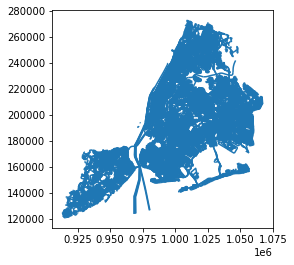

In [6]:
# sanity check of map
streets.plot()

In [7]:
# count of values by street type
streets['rw_type'].value_counts()

1     99224
6      5400
2      4118
10     3834
9      3580
3      3353
8       783
14      424
13      307
7       184
4       167
5       102
12        7
Name: rw_type, dtype: int64

In [8]:
# mapping street type codes to names
street_codes = {
    '1':'Street',
    '2':'Highway',
    '3':'Bridge',
    '4':'Tunnel',
    '5':'Boardwalk',
    '6':'Path/Trail',
    '7':'StepStreet',
    '8':'Driveway',
    '9':'Ramp',
    '10':'Alley',
    '11':'Unknown',
    '12':'Non-Physical Street Segment',
    '13':'U Turn',
    '14':'Ferry Route',
}

streets['rw_type_name'] = streets['rw_type'].map(street_codes)

# sanity check
streets.loc[:, ['rw_type', 'rw_type_name']].head()

,rw_type,rw_type_name
0,1,Street
1,1,Street
2,1,Street
3,1,Street
4,1,Street


In [9]:
# count of values by street type
streets['rw_type_name'].value_counts()

Street                         99224
Path/Trail                      5400
Highway                         4118
Alley                           3834
Ramp                            3580
Bridge                          3353
Driveway                         783
Ferry Route                      424
U Turn                           307
StepStreet                       184
Tunnel                           167
Boardwalk                        102
Non-Physical Street Segment        7
Name: rw_type_name, dtype: int64

# Filter Only Streets

In [10]:
# we are only interested in streets for this project, rw_type equals 1
streets = (
    streets
    .loc[streets['rw_type'] == '1']
    .reset_index(drop=True)
)

print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (99224, 34)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,-1,BRUCKNER,2007-11-29T00:00:00,None,"MULTILINESTRING ((1010270.223 233448.310, 1010...",Street
1,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29T00:00:00,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
2,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29T00:00:00,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
3,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29T00:00:00,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
4,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29T00:00:00,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street


In [11]:
# sanity check data only contain streets
streets['rw_type_name'].value_counts()

Street    99224
Name: rw_type_name, dtype: int64

<AxesSubplot:>

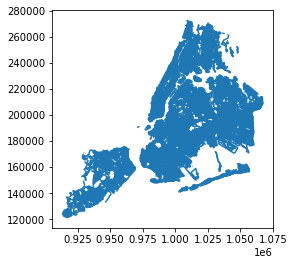

In [12]:
# sanity check map
streets.plot()

In [13]:
# check if id is unique
streets['physicalid'].is_unique

False

In [14]:
# check count of duplicate ids
ser = streets['physicalid'].value_counts()

ser.loc[ser > 1]

41481    2
Name: physicalid, dtype: int64

In [15]:
# identify duplicate ids
streets.loc[streets['physicalid'] == '41481']

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
33834,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,41481,BRUCKNER,2007-11-29T00:00:00,None,"MULTILINESTRING ((1010227.881 233414.931, 1010...",Street
33835,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,41481,BRUCKNER,2007-11-29T00:00:00,None,"MULTILINESTRING ((1010651.162 233805.436, 1010...",Street


In [16]:
# drop duplicates sorted by greatest length
streets = (
    streets
    .astype({'shape_leng':float})
    .sort_values(by=['physicalid', 'shape_leng'], ascending=[True, False])
    .drop_duplicates(subset=['physicalid'])
    .reset_index(drop=True)
)

print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (99223, 34)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,-1,BRUCKNER,2007-11-29T00:00:00,None,"MULTILINESTRING ((1010270.223 233448.310, 1010...",Street
1,1,98-001,None,35.0,11369,98-000,None,AVE,102264249,None,...,4,TW,None,25 AVE,10000,25,2007-11-29T00:00:00,98-099,"MULTILINESTRING ((1019770.393 217876.440, 1020...",Street
2,1,37-001,None,25.0,11363,37-000,None,PL,112261203,None,...,4,TW,None,233 PL,100000,233,2007-11-29T00:00:00,37-099,"MULTILINESTRING ((1052461.825 220583.306, 1052...",Street
3,1,123-001,None,30.0,11413,123-000,None,ST,72267840,None,...,4,TW,None,MILBURN ST,100001,MILBURN,2007-11-29T00:00:00,123-099,"MULTILINESTRING ((1051561.903 187846.554, 1051...",Street
4,1,222-001,None,30.0,11428,222-000,None,AVE,72261096,None,...,4,TF,None,92 AVE,100003,92,2007-11-29T00:00:00,223-099,"MULTILINESTRING ((1057729.808 204117.541, 1058...",Street


In [17]:
# sanity check
streets['physicalid'].is_unique

True

# Clip Street Lines to Boroughs

In [19]:
# examine geom type of streets
streets.geom_type.value_counts()

MultiLineString    99223
dtype: int64

In [20]:
%%time
# clipping the streets that only fall within the boro shapes
streets_clipped = gpd.clip(streets, boros)

print('shape of data: {}'.format(streets_clipped.shape))
streets_clipped.head()

shape of data: (99194, 34)
CPU times: user 12min 25s, sys: 28.2 s, total: 12min 53s
Wall time: 13min


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,-1,BRUCKNER,2007-11-29T00:00:00,None,"LINESTRING (1010270.223 233448.310, 1010354.99...",Street
1,1,98-001,None,35.0,11369,98-000,None,AVE,102264249,None,...,4,TW,None,25 AVE,10000,25,2007-11-29T00:00:00,98-099,"LINESTRING (1019770.393 217876.440, 1020022.80...",Street
2,1,37-001,None,25.0,11363,37-000,None,PL,112261203,None,...,4,TW,None,233 PL,100000,233,2007-11-29T00:00:00,37-099,"LINESTRING (1052461.825 220583.306, 1052572.26...",Street
3,1,123-001,None,30.0,11413,123-000,None,ST,72267840,None,...,4,TW,None,MILBURN ST,100001,MILBURN,2007-11-29T00:00:00,123-099,"LINESTRING (1051561.903 187846.554, 1051902.84...",Street
4,1,222-001,None,30.0,11428,222-000,None,AVE,72261096,None,...,4,TF,None,92 AVE,100003,92,2007-11-29T00:00:00,223-099,"LINESTRING (1057729.808 204117.541, 1058232.69...",Street


In [21]:
# examine new geom types performed by clip method
streets_clipped.geom_type.value_counts()

LineString         99124
MultiLineString       70
dtype: int64

In [22]:
# filter geom_type == 'LineString' 
streets_clipped = (
    streets_clipped
    .loc[streets_clipped.geom_type == 'LineString']
    .reset_index(drop=True)
)

# recalculate street length
streets_clipped['shape_leng'] = streets_clipped.length

# sanity check
print('shape of data: {}'.format(streets_clipped.shape))
streets_clipped.head()

shape of data: (99124, 34)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,None,None,36.0,10454,None,None,BLVD,1422600156,None,...,2,FT,None,BRUCKNER BLVD,-1,BRUCKNER,2007-11-29T00:00:00,None,"LINESTRING (1010270.223 233448.310, 1010354.99...",Street
1,1,98-001,None,35.0,11369,98-000,None,AVE,102264249,None,...,4,TW,None,25 AVE,10000,25,2007-11-29T00:00:00,98-099,"LINESTRING (1019770.393 217876.440, 1020022.80...",Street
2,1,37-001,None,25.0,11363,37-000,None,PL,112261203,None,...,4,TW,None,233 PL,100000,233,2007-11-29T00:00:00,37-099,"LINESTRING (1052461.825 220583.306, 1052572.26...",Street
3,1,123-001,None,30.0,11413,123-000,None,ST,72267840,None,...,4,TW,None,MILBURN ST,100001,MILBURN,2007-11-29T00:00:00,123-099,"LINESTRING (1051561.903 187846.554, 1051902.84...",Street
4,1,222-001,None,30.0,11428,222-000,None,AVE,72261096,None,...,4,TF,None,92 AVE,100003,92,2007-11-29T00:00:00,223-099,"LINESTRING (1057729.808 204117.541, 1058232.69...",Street


In [23]:
streets_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99124 entries, 0 to 99123
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   rw_type       99124 non-null  object  
 1   l_low_hn      83398 non-null  object  
 2   pre_direct    9464 non-null   object  
 3   st_width      99124 non-null  object  
 4   r_zip         99055 non-null  object  
 5   r_low_hn      83398 non-null  object  
 6   bike_lane     13119 non-null  object  
 7   post_type     95949 non-null  object  
 8   r_blkfc_id    99124 non-null  object  
 9   bike_trafd    13119 non-null  object  
 10  frm_lvl_co    99124 non-null  object  
 11  post_modif    213 non-null    object  
 12  pre_type      2799 non-null   object  
 13  full_stree    99124 non-null  object  
 14  l_blkfc_id    99124 non-null  object  
 15  shape_leng    99124 non-null  float64 
 16  to_lvl_co     99124 non-null  object  
 17  modified      99079 non-null  object  
 18

In [24]:
# return specified columns
cols = [
    'physicalid', 
    'st_label',
    'st_name',
    'full_stree',
    'rw_type', 
    'rw_type_name',  
    'st_width',
    'frm_lvl_co', 
    'to_lvl_co', 
    'borocode', 
    'shape_leng',
    'geometry',
]

streets_clipped = streets_clipped.loc[:, cols]

# sanity check
print('shape of data: {}'.format(streets_clipped.shape))
streets_clipped.head()

shape of data: (99124, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,-1,BRUCKNER BLVD,BRUCKNER,BRUCKNER BLVD,1,Street,36.0,13,13,2,522.161372,"LINESTRING (1010270.223 233448.310, 1010354.99..."
1,10000,25 AVE,25,25 AVE,1,Street,35.0,13,13,4,254.863947,"LINESTRING (1019770.393 217876.440, 1020022.80..."
2,100000,233 PL,233,233 PL,1,Street,25.0,13,13,4,272.837036,"LINESTRING (1052461.825 220583.306, 1052572.26..."
3,100001,MILBURN ST,MILBURN,MILBURN ST,1,Street,30.0,13,13,4,485.074277,"LINESTRING (1051561.903 187846.554, 1051902.84..."
4,100003,92 AVE,92,92 AVE,1,Street,30.0,13,13,4,524.426714,"LINESTRING (1057729.808 204117.541, 1058232.69..."


In [25]:
streets_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99124 entries, 0 to 99123
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   physicalid    99124 non-null  object  
 1   st_label      99124 non-null  object  
 2   st_name       99124 non-null  object  
 3   full_stree    99124 non-null  object  
 4   rw_type       99124 non-null  object  
 5   rw_type_name  99124 non-null  object  
 6   st_width      99124 non-null  object  
 7   frm_lvl_co    99124 non-null  object  
 8   to_lvl_co     99124 non-null  object  
 9   borocode      99124 non-null  object  
 10  shape_leng    99124 non-null  float64 
 11  geometry      99124 non-null  geometry
dtypes: float64(1), geometry(1), object(10)
memory usage: 9.1+ MB


In [26]:
# save file
filename = 'data/streets-clipped.gpkg'

streets_clipped.to_file(
    filename=filename,
    driver='GPKG',
    layer='name',
    index=False
)

# verify output
%ls data/

README.md                       street-flooding-query.csv
street-flooding-complaints.csv  streets-clipped.gpkg


# Sanity Check of Output Data

In [27]:
path = 'data/streets-clipped.gpkg'
streets = gpd.read_file(path)

# sanity check of data
print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (99124, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,-1,BRUCKNER BLVD,BRUCKNER,BRUCKNER BLVD,1,Street,36.0,13,13,2,522.161372,"LINESTRING (1010270.223 233448.310, 1010354.99..."
1,10000,25 AVE,25,25 AVE,1,Street,35.0,13,13,4,254.863947,"LINESTRING (1019770.393 217876.440, 1020022.80..."
2,100000,233 PL,233,233 PL,1,Street,25.0,13,13,4,272.837036,"LINESTRING (1052461.825 220583.306, 1052572.26..."
3,100001,MILBURN ST,MILBURN,MILBURN ST,1,Street,30.0,13,13,4,485.074277,"LINESTRING (1051561.903 187846.554, 1051902.84..."
4,100003,92 AVE,92,92 AVE,1,Street,30.0,13,13,4,524.426714,"LINESTRING (1057729.808 204117.541, 1058232.69..."


<AxesSubplot:>

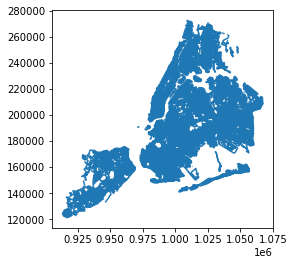

In [28]:
streets.plot()

In [29]:
# id is unique
streets['physicalid'].is_unique

True